In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import scipy.stats as ss
import csv
import numpy as np
import sklearn
import glob
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
#df = pd.read_csv('499.csv')
#df.head()

In [3]:
#df.to_csv("499.csv", header=['EDAD', 'PESO','TALLA', 'IMC', 'CREATININA', 'CISTATINA', 'HDL', 'LDL', 'TRIGLICERIDOS', 
#'GOT', 'GPT', 'GGT', 'ALBUMINURIA', 'FERRITINA', 'HOMA', 'INSULINA', 'GLUCEMIA', 
#'HB-GLICOSILADA', 'PCR', 'VITAMINA-D', 'TAS', 'TAD', 'FECHA'], index=False)

### CONVERTIR PACIENTES (los 1700 csv) A UNA LISTA Y LA LISTA A CSV

In [4]:
# Primero especificamos un patrón del archivo y lo pasamos como parámetro en la función glob
csv_files = glob.glob('*.csv')
csv_files.pop()

new_csv_files =  [item.replace(".csv", "") for item in csv_files]
#new_csv_files.pop()
# Mostrar el archivo csv_files, el cual es una lista de nombres
print(new_csv_files)

IndexError: pop from empty list

In [8]:
len(new_csv_files)

1794

In [9]:
df = pd.DataFrame(new_csv_files, columns=["Pacientes"])
df.to_csv('new_csv_files.csv', index=False)

### CREO UNA LISTA A PARTIR DEL CSV PACIENTES PROGRESORES

In [10]:
with open('pacientes_progresores.csv', 'r') as archivo:
    leer = csv.reader(archivo)
    lista = list(leer)
    #print(lista)

In [11]:
lista_HC = []
for i in lista:
    lista_HC.append(i[0])

In [12]:
lista_HC.pop(0)
#print(lista_HC)
print(len(lista_HC))

1647


### COMPARO AMBAS LISTAS Y ELIMINO PACIENTES NO COINCIDENTES

In [13]:
comparacion = []
 
for item in new_csv_files:
    if item in lista_HC:
        comparacion.append(item)
    

In [16]:
print(comparacion)

['100220', '100257', '10045', '100505', '100598', '100756', '100889', '101033', '10113', '101310', '101811', '101956', '102007', '102025', '102370', '102634', '102790', '10281', '103000', '103232', '104288', '104376', '104737', '104809', '105227', '105260', '105426', '105617', '10579', '106070', '106107', '106545', '106810', '106831', '107178', '107918', '107954', '108222', '108390', '108657', '1087', '108789', '109195', '109303', '109322', '109853', '109972', '110337', '110457', '11068', '110788', '11129', '111524', '111529', '111778', '111892', '112021', '112225', '112238', '1129', '11300', '11318', '113556', '114131', '114513', '114541', '114611', '114670', '114840', '115087', '115353', '115857', '115994', '116420', '11667', '116729', '116788', '116994', '117851', '11791', '118197', '118206', '118740', '118769', '119174', '119621', '119972', '120267', '120652', '121079', '121198', '12170', '121800', '121961', '122066', '122138', '122170', '12236', '122688', '122826', '122891', '1229

In [14]:
df = pd.DataFrame(comparacion, columns=["Pacientes"])
df.to_csv('pacientes_procesados.csv', index=False)

### AHORA TENGO UN CSV EN EL CUAL CADA LINEA ES CADA UNO DE LOS CSV INDEPENDIENTES QUE TENIA ANTERIORMENTE PARA CADA SUJETO, ¿COMO PUEDO HACER QUE CADA LINEA VUELVA A SER UN CSV INDEPENDIENTE Y ASI TENER 1647 PACIENTES TRAS HABER ELIMINADO LOS 100 Y PICO QUE YA ERAN DIABÉTICOS?

1. Lista de csv de los nombres de ficheros
1. Ver coincidencias de lista con progresión y lista de ficheros
1. Generar un dataframe con n_historia y con variable targer (progresion)

df['id'] #columna de identificación
df['progresion_diab'] = #target

df lista de pacientes que tenemos la variable y y tenemos datos.

1. Si estamos con la solución ajustar regresión polinómica

 1.pinta 5 pacientes progresores y cinco no progresores

pat_id = 5050

Plots de variables vs revisiones


X_prog = list de matrices(mxn) filas= revisiones, columnas= variables, 



X_no_prog


In [ ]:
df_progresor
df_comparacion['progresion'] = df_progresor['progresion'][df_progressor['N_hist'] == df_comparacion['Pacientes']]

In [5]:
def get_pat(idd,path='./pacientes'):
    
    
    #lee fichero de ese id
    

SyntaxError: invalid syntax (<ipython-input-5-5e5490150a06>, line 2)

In [13]:
import numpy as np

idd = '218'
X = np.genfromtxt(idd+'.csv',delimiter = ',',usecols = np.arange(21))

In [14]:
print(X)



[[ 70.    76.   147.    35.2    0.8    0.79  52.   146.    61.    10.
   15.    15.    18.03 157.     3.95  16.   100.      nan   3.41  23.
  195.  ]
 [ 71.    80.   147.    37.     0.8    0.83  54.   184.    52.    10.
   16.    16.    19.01 118.     3.82  18.4   84.     5.4    3.34  38.
  195.  ]
 [ 71.    76.   147.    35.2    0.9    0.85  51.   152.    53.      nan
   17.    15.    54.12  88.      nan    nan  84.      nan   3.6     nan
  209.  ]
 [ 72.    76.   147.    35.2    0.8    0.79  53.   167.    66.    13.
   13.    12.    71.18  94.     2.67  13.2   82.     5.6    3.48  36.
  196.  ]
 [ 72.    77.   147.    35.6    1.     1.09  53.    65.    55.     9.
   18.    14.     0.   158.     3.91  18.2   87.     5.2    3.19    nan
  155.  ]
 [ 73.    76.   147.    35.2    0.9    0.85  42.   130.    76.     9.
   14.    12.     5.2   94.     3.14  15.3   83.     5.4    3.45  52.
  148.  ]
 [ 73.    80.   147.    37.     0.9     nan  50.   133.    55.     9.
   11.    14.     0.    

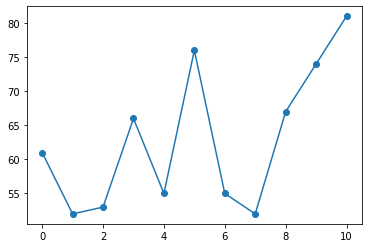

In [22]:
import matplotlib.pyplot as plt



plt.plot(X[:,8],'o-')

In [ ]:
from contextlib import ExitStack
import math

# Generamos una función para leer las líneas de 
# un fichero.
def get_lines(fname):
    with open(fname, 'rt') as file:
        lines = 0
        for l in file: lines += 1
    return lines

# Función para dividir el fichero csv en varios
def split_csv(path_csv, splitby):

    with open(path_csv, 'r') as csvfile, ExitStack() as stack:
        # Líneas totales del fichero
        lines = get_lines(path_csv)

        # número de líneas por fichero (excepto el último)
        chunk_num_lines = math.floor(lines/splitby)
        chunk_num_lines = chunk_num_lines if chunk_num_lines > 0 else 1

        # Máximo de ficheros que podemos generar
        # por si ponemos un número "loco"
        max_files = min(lines, splitby)

        # Archivos que vamos a crear
        filenames = ['chunk{}.csv'.format(i) for i in range(0, max_files)]

        # Ficheros (Chunks)
        files = [ stack.enter_context(open(fname, 'wt')) for fname in filenames ]

        # Índice del fihcero actual
        file_index = 0
        # Máximo índice
        max_index = len(filenames) - 1

        # Recorremos el fichero
        for idx, line in enumerate(csvfile):
            # Obtenemos el chunk sobre el que escribir
            # en base al índice actual
            file = files[file_index]
            # Escribimos línea
            file.write(line)

            # Actualizamos el índice cuando hayamos escrito
            # el máximo de líneas para el fichero
            # escepto si file_index == max_index
            if (idx + 1) % chunk_num_lines == 0 and file_index < max_index:
                file_index += 1

In [ ]:
#get_lines('pacientes_procesados.csv')

In [ ]:
#split_csv('pacientes_procesados.csv', 1648)

In [15]:
list_data = []
  
# Escribimos un loop que irá a través de cada uno de los nombres de archivo a través de globbing y el resultado final será la lista dataframes
for filename in new_csv_files:
    data = pd.read_csv(filename)
    list_data.append(data)
#Para chequear que todo está bien, mostramos la list_data por consola
#list_data
 
#pd.concat(list_data,axis = 1, sort = False)

FileNotFoundError: [Errno 2] File b'100220' does not exist: b'100220'